<h1 align=\"center\"><font color='green'><font size=\"6\">Machine Learning</font> </h1>

<div style="background-color: #90EE90;">.</div>  </div>

 - Machine learning (ML) is a subset of artificial intelligence (AI) that enables computers to learn from and make predictions or decisions based on data without being explicitly programmed for specific tasks. 
 - Instead of using hard-coded rules, machine learning algorithms learn from patterns in data and improve their performance over time.


#### Types of Machine Learning:

 - Supervised Learning:
    - In supervised learning, the model is trained on labeled data, where both the input and the corresponding output (target) are known.
     - The goal is to establish a relationship between inputs and outputs to accurately predict results for new, unseen data.
 
 
 

 - Unsupervised Learning:
    - In unsupervised learning, the model is given data without any labels or specific output. 
     - The goal is to find hidden patterns or structures in the data, such as clustering similar data points or reducing dimensionality.

 - Semi-Supervised Learning:
    - Semi-supervised learning lies between supervised and unsupervised learning.
     - The model is trained on a small amount of labeled data and a large amount of unlabeled data, leveraging the labeled data to improve learning from the unlabeled portion.
 
 - Self-Supervised Learning: 
    - In self-supervised learning, the model generates labels from the input data itself. The model typically learns to predict a part of the data from other parts.
     - It is often used for tasks like pretraining models that will later be fine-tuned on specific supervised tasks.
 
 - Reinforcement Learning:
    - Reinforcement learning involves an agent that learns to make decisions by interacting with an environment.
     - The agent receives rewards or penalties for its actions and learns to maximize cumulative rewards over time.


### Supervised Learning
  - Supervised learning is a machine learning approach where models are trained on labeled data to predict outcomes or classify data based on known input-output pairs. 
   - It involves learning from examples with known results to make predictions on new, unseen data.

##### Types of Supervised Learning:

  Classification:
  -  Predicts categorical outcomes. Examples include spam detection (spam or not spam) and medical diagnosis (disease or no disease).

 Regression:
 - Predicts continuous outcomes. Examples include predicting house prices, stock prices, or temperature.
    


In [1]:
#These are further divided into:

<div class = "alert alert-block alert-success">
     <font size = "5">
   Linear Regression

 - Linear regression is a supervised machine learning technique that uses statistical methods to model the relationship between a dependent variable (y) and one or more independent variables (x).
  - It assumes a linear relationship between the variables, meaning that the relationship can be represented by a straight line.

In [2]:
#Below is a diagram explaining the linear regression

#### Applications
 - Predicting house prices: Using features like square footage, number of bedrooms, and location to estimate the value of a house.
 - Forecasting sales: Analyzing factors like marketing spend and economic indicators to predict future sales.
 - Understanding the relationship between income and education: Examining how education level affects income levels.

In [3]:
#importing necessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
#Generating a synthetic dataset to predict school fees
np.random.seed(42)
Grade = np.random.randint(1, 10, size=50) #students from Grade 1 to 10
Activities = np.random.choice([2, 5], size=50) #students must participate in 2-5 activities
Fees = (Grade * 10000) + (Activities * 100) + np.random.normal(0, 1000, 50)
#Simulating Fees based on Grade, activities and random noise

In [5]:
School = pd.DataFrame({
    'Grade': Grade,
    'Activities': Activities,
    'Fees': Fees
})

School.head()

,Grade,Activities,Fees
0,7,5,68936.933205
1,4,5,39704.369008
2,8,5,81430.584401
3,5,5,51177.767410
4,7,5,71198.440259


In [6]:
#Spliting the dataset into features (Grade, Activities) and target (Fees).
# Assigning columns to Features(X) and target(y) 
X = School[["Grade","Activities"]]
y = School["Fees"]

#Performing an 80/20 split to create training and test datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [7]:
# X is in uppercase because it represents many input features (like a table with multiple columns),
# While y is in lowercase as it is just one target value (like a single column). 

In [8]:
#Training the model 
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
# Predicting on the test set
y_pred = model.predict(X_test)
y_pred

array([60408.42830752, 90439.59755548, 29994.55934086, 29994.55934086,
       60408.42830752, 19984.16959154, 40387.64880888, 70036.11833814,
       50015.3388395 , 50398.0385582 ])

In [10]:
#Calculating MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared Error: {mse}")
print(f"R-squared: {r2}")

Mean squared Error: 1288097.9002499683
R-squared: 0.9969252399293336


In [11]:
# Applying model on new data 
new_student = np.array([[3, 2]]) # Grade 3 student involved in 2 activities
predicted_salary = model.predict(new_student)

print(f"Predicted Fees for Grade 3 student involved in 2 activities: Rs.{predicted_salary[0]:,.2f}")

Predicted Fees for Grade 3 student involved in 2 activities: Rs.29,994.56


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


We are getting warning because:
- we trained the model with data that had feature names.
 - Now, we're trying to use the model to predict on new data that doesn't have feature names.

In [12]:
# Creating a DataFrame with column names
new_student_df = pd.DataFrame({"Grade": [3], "Activities": [2]})
predicted_salary = model.predict(new_student_df)

print(f"Predicted Fees for Grade 3 student involved in 2 activities: Rs.{predicted_salary[0]:,.2f}")

Predicted Fees for Grade 3 student involved in 2 activities: Rs.29,994.56


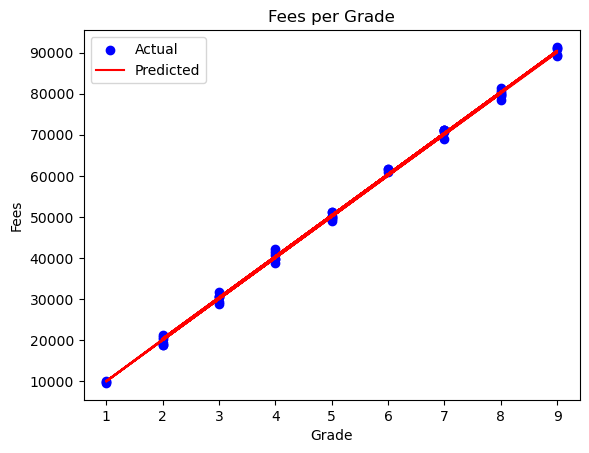

In [13]:
plt.scatter(School['Grade'], School['Fees'], color='blue', label='Actual')
plt.plot(School['Grade'], model.predict(X), color='red', label='Predicted')
plt.xlabel('Grade')
plt.ylabel('Fees')
plt.title('Fees per Grade')
plt.legend()
plt.show()
